# Log Analysis with Regex

*Logs* describe a series of events happening in time.  When you run a flask application, capturing the output will be a log of requests.  At the beginning of the semester, analyzed a log of git commits.  When logs contain text, regular expressions can help us extract useful information.

In this reading, we'll use regular expressions to analyze the git history of this repo: https://github.com/tylerharter/cs320.  After checking out the repo, we ran `git log > git-log.txt` to produce the "git-log.txt" file we'll be using here.

We'll use regular expressions to extract the following:

1. all commit numbers
2. email addresses
3. forks from which pull requests were made
4. all dates 

## 1. Commit Numbers

`b046b85da7f5d65ef2131eefe72a8c1a39c5d139` is an example of a valid commit number.  It is 40 characters long, and contains only the 16 hexidecimal digits (0-9 and a-f).  For test cases, we'll put that example as the first line is a valid commit, and the following ones are not (because they are too long, contain invalid characters, or are too short -- in that order).

In [1]:
tests = """
b046b85da7f5d65ef2131eefe72a8c1a39c5d139
0000000000000000000000000000000000000001234
b046b85da7f5d65ef2131eefe72a8c1a39c5dzzz
b046b85da7f5d65ef2131eefe72a8c1a39c5d
"""

The character class that matches a digit is `[0-9a-fA-F]`.  Let's try matching 40 of those.

In [2]:
import re

for match in re.findall(r"[0-9a-fA-F]{40}", tests):
    print(match)

b046b85da7f5d65ef2131eefe72a8c1a39c5d139
0000000000000000000000000000000000000001


Do you see what happened?  Although `0000000000000000000000000000000000000001234` is not a valid commit number, as it is 43 characters instead of 40, the regex is recognizing the first 40 characters as a valid regex.  This probably isn't what we want.

To fix it, we'll use a new metacharacter, `\b`.  According to the Python docs, this "matches the empty string, but only at the beginning or end of a word. A word is defined as a sequence of word characters."  (word characters are `[a-zA-Z0-9_]`, so commit numbers conveniently consist of word characters).

In [3]:
import re

for match in re.findall(r"\b[0-9a-fA-F]{40}\b", tests):
    print(match)

b046b85da7f5d65ef2131eefe72a8c1a39c5d139


Nice!  Now that we have developed and tested the regex we want, we can use on our big log file from the git repo:

In [4]:
with open("git-log.txt") as f:
    log = f.read()
print(log[:500] + "...")

commit 24c509d20afed69592442f9d1de97131dab6bd3a
Author: tylerharter <tylerharter@gmail.com>
Date:   Mon Mar 1 15:59:16 2021 -0600

    debug 5

commit 0d5316187148c72fd65439f7aec5da6859cc8913
Author: Peyman <payman.pm@gmail.com>
Date:   Mon Mar 1 15:26:45 2021 +0000

    updated README

commit 79a3058f59e43953f5036e3980b47eec9a7ede62
Merge: 44c1e8a 41fd923
Author: Peyman <payman.pm@gmail.com>
Date:   Mon Mar 1 15:23:18 2021 +0000

    Merge branch 'master' of https://github.com/tylerharter/cs320...


In [5]:
commits = re.findall(r"\b[0-9a-fA-F]{40}\b", log)
print(f"Found {len(commits)} commits.  Here are the first 10:")
commits[:10]

Found 524 commits.  Here are the first 10:


['24c509d20afed69592442f9d1de97131dab6bd3a',
 '0d5316187148c72fd65439f7aec5da6859cc8913',
 '79a3058f59e43953f5036e3980b47eec9a7ede62',
 '44c1e8a1f57ff854a130a162922a4a97c7fc6991',
 '41fd92391f01969eca8d11a6e3462c3025355b03',
 '2b0846b3830a2c0a61477c968a5abd6303d9ba84',
 'fc44fd584eb807622f516f929c2bfd4e646c6520',
 '5dbe4ed8b6da984a78e38bc9f3a347b739373f13',
 '546a37d6c9fd92120f8bd6608ce05a66597ca2e9',
 '07971e14d6afd534de889a53ac5517472be03e1c']

## 2. Email Addresses

We see email address in the log, like this:

```
commit 24c509d20afed69592442f9d1de97131dab6bd3a
Author: tylerharter <tylerharter@gmail.com>
Date:   Mon Mar 1 15:59:16 2021 -0600

    debug 5
```

It looks like we want everything between `<` and `>`.

In [6]:
emails = re.findall(r"<.*>", log)
emails[:10]

['<tylerharter@gmail.com>',
 '<payman.pm@gmail.com>',
 '<payman.pm@gmail.com>',
 '<payman.pm@gmail.com>',
 '<tylerharter@gmail.com>',
 '<tylerharter@gmail.com>',
 '<payman.pm@gmail.com>',
 '<payman.pm@gmail.com>',
 '<payman.pm@gmail.com>',
 '<payman.pm@gmail.com>']

Oops, we don't want to include those angle brackets (`<` and `>`).  Let's put parentheses (`(` and `)`) around just the email part, with `r"<(.*)>"`.

In [7]:
emails = re.findall(r"<(.*)>", log)
print(f"Found {len(emails)} emails.  Here are the first 10:")
emails[:10]

Found 525 emails.  Here are the first 10:


['tylerharter@gmail.com',
 'payman.pm@gmail.com',
 'payman.pm@gmail.com',
 'payman.pm@gmail.com',
 'tylerharter@gmail.com',
 'tylerharter@gmail.com',
 'payman.pm@gmail.com',
 'payman.pm@gmail.com',
 'payman.pm@gmail.com',
 'payman.pm@gmail.com']

If we want, we can throw these in a pandas Series, allowing us to count occurrences, plotting the result in a bar plot.

In [8]:
%matplotlib inline

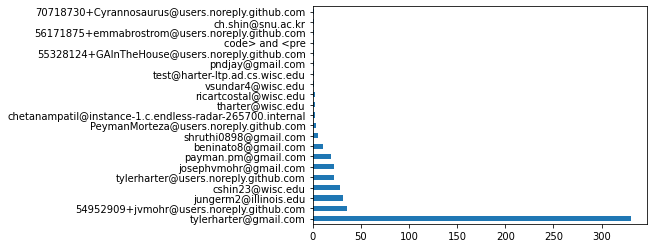

In [9]:
import pandas as pd

pd.Series(emails).value_counts().plot.barh()

Note that some commits look like this:

```
commit 6f331b977075991eaafc892e2b551e1346cfb396
Merge: bdc058d dee374a
Author: Tyler Caraza-Harter <tylerharter@users.noreply.github.com>
Date:   Wed Feb 10 08:29:15 2021 -0600

    Merge pull request #25 from ch-shin/master
    
    mini.zip update
```

The "Author" email address sometimes corresponds to the person who merged a pull request, not the original author.  Can we find the actual git users behind the pull requests?

## 3. Pull Requests

Can we extract `ch-shin/master` from text like `Merge pull request #25 from ch-shin/master`, as in the last example of the above section?

In [10]:
re.findall(r"Merge pull request #\d+ from \w+/\w+", log)

['Merge pull request #28 from GAInTheHouse/master',
 'Merge pull request #1 from emmabrostrom/patch',
 'Merge pull request #23 from varun19299/master',
 'Merge pull request #22 from jaimericart/patch',
 'Merge pull request #21 from jaimericart/patch',
 'Merge pull request #19 from Cyrannosaurus/patch',
 'Merge pull request #18 from tylerharter/newbranch',
 'Merge pull request #16 from beninato8/master',
 'Merge pull request #13 from tylerharter/p3_handin',
 'Merge pull request #15 from beninato8/master',
 'Merge pull request #14 from beninato8/master',
 'Merge pull request #11 from vmpatil/master',
 'Merge pull request #12 from beninato8/master',
 'Merge pull request #10 from beninato8/master',
 'Merge pull request #8 from beninato8/master',
 'Merge pull request #6 from beninato8/master',
 'Merge pull request #5 from beninato8/master',
 'Merge pull request #2 from beninato8/master',
 'Merge pull request #1 from jungerm2/master']

That looks promising!  Let's put some parentheses around key parts, to extract what we want:

In [11]:
matches = re.findall(r"Merge pull request #(\d+) from (\w+)/(\w+)", log)
for match in matches:
    print(match)
    pr = match[0]
    user = match[1]
    branch = match[2]

('28', 'GAInTheHouse', 'master')
('1', 'emmabrostrom', 'patch')
('23', 'varun19299', 'master')
('22', 'jaimericart', 'patch')
('21', 'jaimericart', 'patch')
('19', 'Cyrannosaurus', 'patch')
('18', 'tylerharter', 'newbranch')
('16', 'beninato8', 'master')
('13', 'tylerharter', 'p3_handin')
('15', 'beninato8', 'master')
('14', 'beninato8', 'master')
('11', 'vmpatil', 'master')
('12', 'beninato8', 'master')
('10', 'beninato8', 'master')
('8', 'beninato8', 'master')
('6', 'beninato8', 'master')
('5', 'beninato8', 'master')
('2', 'beninato8', 'master')
('1', 'jungerm2', 'master')


We're looping over tuples with the three pieces of info we want: commit number, github user, and branch.  We could pull that out with `pr = match[0]` and similar, as in the above example.  Alternatively, Python has a feature called *unpacking* that is useful in such cases.  Instead of `match` on the line we define our `for` loop, we can list the three variables we want to fill from the tuple we are currently looping over.

In [12]:
for pr, user, branch in matches:
    print(user)

GAInTheHouse
emmabrostrom
varun19299
jaimericart
jaimericart
Cyrannosaurus
tylerharter
beninato8
tylerharter
beninato8
beninato8
vmpatil
beninato8
beninato8
beninato8
beninato8
beninato8
beninato8
jungerm2


## 4. Dates

Look at the date line of a commit entry in the log:
    
```
commit 24c509d20afed69592442f9d1de97131dab6bd3a
Author: tylerharter <tylerharter@gmail.com>
Date:   Mon Mar 1 15:59:16 2021 -0600

    debug 5
```

We see a date starts with "Date:" and some spaces (excluded) and ends with a four digit number, such as "2021" (included).  Let's try the match.

In [13]:
text = "Date:   Mon Mar 1 15:59:16 2021 -0600"
re.findall(r"Date:\s+(.*\d{4})", text)

['Mon Mar 1 15:59:16 2021 -0600']

Do you see the problem?  Both `Date:   Mon Mar 1 15:59:16 2021` and `Date:   Mon Mar 1 15:59:16 2021 -0600` could theoretically match (depending on how many characters `.*` matches), as both end in four digits.  `0600` is timezone info, and let's assume we don't want that.

By default, the `*` is greedy, meaning it prefers to match more characters.  That's why we got the longer option.  If we use `*?` instead, it will no longer be greedy, and we'll get the shorter version, ending in the four digits of the year.

In [14]:
text = "Date:   Mon Mar 1 15:59:16 2021 -0600"
re.findall(r"Date:\s+(.*?\d{4})", text)

['Mon Mar 1 15:59:16 2021']

Great, now we can test on the original data.

In [15]:
dates = re.findall(r"Date:\s+(.*?\d{4})", log)
print(f"Found {len(dates)} dates.  Here are the first 10:")
dates[:10]

Found 524 dates.  Here are the first 10:


['Mon Mar 1 15:59:16 2021',
 'Mon Mar 1 15:26:45 2021',
 'Mon Mar 1 15:23:18 2021',
 'Mon Mar 1 15:21:34 2021',
 'Mon Mar 1 08:44:41 2021',
 'Mon Mar 1 08:42:30 2021',
 'Mon Mar 1 04:05:58 2021',
 'Mon Mar 1 04:03:36 2021',
 'Sun Feb 28 00:08:27 2021',
 'Sun Feb 28 00:05:01 2021']

## Conclusion

Regular expressions are very helpful for analyzing logs and other text-based data.  Unfortunately, it's difficult to get a regular expression correct on the first attempt; we made several intuitive mistakes along the way in this reading before arriving at the correct expression.  In such cases, it's difficult to troubleshoot when running on the big dataset, so do what we did here: create some simple examples and revise your regular expression until it works with those.  Then go back and use it on your full dataset.